In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import *

# Test Lyapunov QR function using provided example

## Example
The Henon map is given by
$$M_H\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} 1-\alpha x^2+y \\ \beta x \end{pmatrix}.$$

Consider a period-2 solution for $\alpha=0.8$ and $\beta=0.4$.

In [6]:
# define map
def HenonMap(x,p):
    p[0] = alpha
    p[1] = beta
    
    xout = np.empty(x.shape)*np.nan
    
    xout[0] = 1 - alpha*x[0]**2+x[1];
    xout[1] = beta*x[0]
    return xout

In [7]:
# set parameters (period-2 solution)
alpha = 0.8
beta = 0.4
p = np.array([alpha,beta])

# set initial condition
x0 = np.array([1.,1.])

# calculate solution orbit
tn = np.arange(0,1001,1)
xn = np.empty([x0.shape[0],tn.shape[0]])*np.nan
xn[:,0] = x0

for ti in tn[:-1]:
    xi = HenonMap(xn[:,ti],p)
    xn[:,ti+1] = xi       

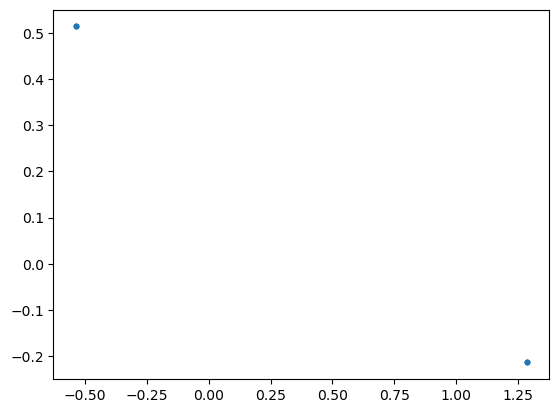

In [8]:
# Plot to confirm period-2 nature
plt.plot(xn[0,-10:],xn[1,-10:],'.')
plt.show()

In [9]:
# Calculate Lyapunov exponents
N = 1000
lyaps = LyapQR(lambda x: HenonMap(x,p),x0,N)

C:\Users\quinncr\Documents\Python\KYA314\2025\custom_functions.py:299: RuntimeWarning: divide by zero encountered in scalar divide
  Lambda[:,j] = 1/j*np.sum(np.log(Rdiag[:,:j]),axis=1)
C:\Users\quinncr\Documents\Python\KYA314\2025\custom_functions.py:299: RuntimeWarning: invalid value encountered in multiply
  Lambda[:,j] = 1/j*np.sum(np.log(Rdiag[:,:j]),axis=1)


In [10]:
lyaps[0]

array([-0.14493543, -0.7713553 ])

In [11]:
np.exp(2*lyaps[0])

array([0.7483602 , 0.21380079])

In [12]:
M2 = lambda x: HenonMap(HenonMap(x,p),p)

J = MyJacobian(M2,xn[:,-1],1e-6).squeeze()
eigs = np.linalg.eig(J)[0]
print(abs(eigs))

[0.74532998 0.21467002]


### Now consider $\alpha=1.4$ and $\beta=0.3$

In [13]:
# set parameters (period-2 solution)
alpha = 1.4
beta = 0.3
p = np.array([alpha,beta])

# set initial condition
x0 = np.array([1.,1.])

# calculate solution orbit
tn = np.arange(0,1001,1)
xn = np.empty([x0.shape[0],tn.shape[0]])*np.nan
xn[:,0] = x0

for ti in tn[:-1]:
    xi = HenonMap(xn[:,ti],p)
    xn[:,ti+1] = xi       

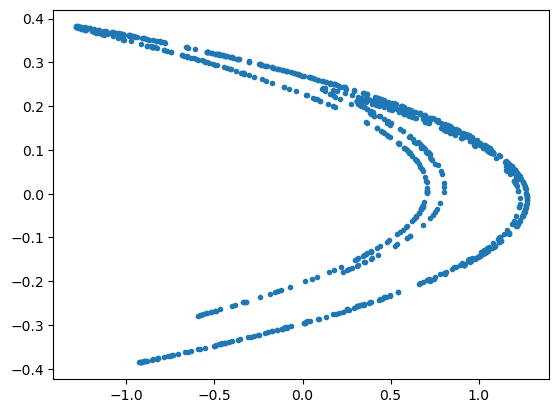

In [14]:
# Plot to confirm chaotic nature
plt.plot(xn[0,100:],xn[1,100:],'.')
plt.show()

In [15]:
# Calculate Lyapunov exponents
N = 1000
lyaps = LyapQR(lambda x: HenonMap(x,p),x0,N)

In [16]:
lyaps[0]

array([ 0.41958584, -1.62355865])